In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("shopping_data_jdvh2.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
from scipy.cluster.hierarchy import dendrogram,linkage #Linkage is distance measure

In [7]:
data = df[['Age','Annual Income (k$)']] #Selecting Numerical Columns only

In [9]:
data.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


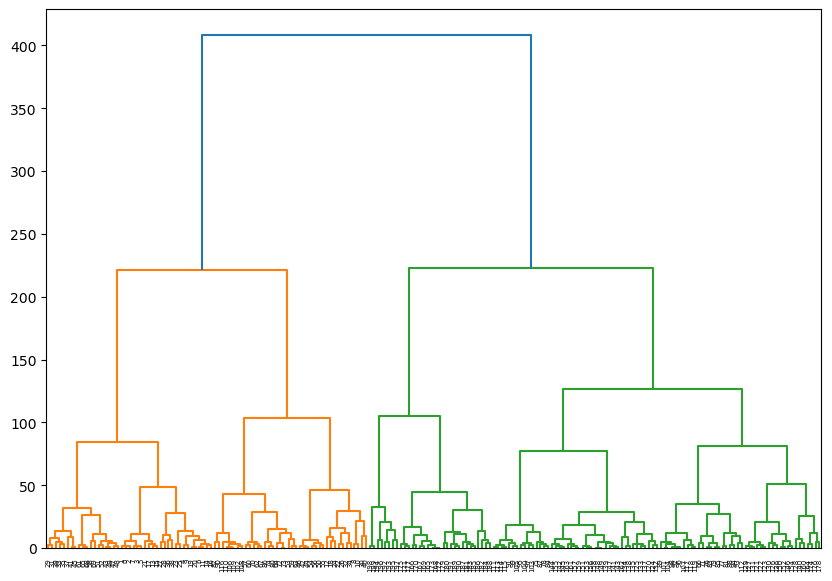

In [11]:
link = linkage(data,method='ward') #General use method Ward for most of the datasets
plt.figure(figsize=(10,7)) #Increasing the Image size
dendrogram(link)
plt.show()

In [13]:
data.shape

(200, 2)

In [29]:
# Optional
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5,linkage='ward')
cluster.fit(data)
cluster.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       2, 1, 3, 3, 1, 2, 1, 1, 1, 4, 2, 2, 4, 2, 1, 2, 1, 2, 4, 2, 1, 4,
       2, 2, 1, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 1, 4, 2, 4, 1, 2, 1, 1,
       1, 4, 2, 4, 4, 4, 1, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Text(0, 0.5, 'Income')

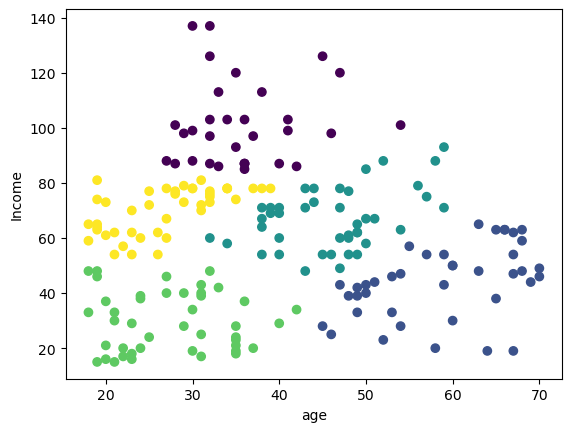

In [31]:
plt.scatter(data['Age'],data['Annual Income (k$)'], c = cluster.labels_ )
plt.xlabel("age")
plt.ylabel("Income")

In [33]:
data['cluster'] = cluster.labels_

C:\Users\Sumit\AppData\Local\Temp\ipykernel_32384\3808512675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = cluster.labels_


In [35]:
data.head(20)

,Age,Annual Income (k$),cluster
0,19,15,3
1,21,15,3
2,20,16,3
3,23,16,3
4,31,17,3
5,22,17,3
6,35,18,3
7,23,18,3
8,64,19,1
9,30,19,3


# K-means Clustering

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Income Data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Income Data.csv'

In [ ]:
plt.scatter(df['income'],df['age'])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)


km.fit(df)

In [ ]:
km.cluster_centers_

In [ ]:
df['cluster'] = km.labels_

In [ ]:
df.head(10)

In [ ]:
import seaborn as sns
sns.scatterplot(x='income',y='age',hue='cluster',data=df)
plt.show()

#As the data is not precisiely clustered, there is need to scale the data
#Think about outliers here

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(df[['income','age']])
scaled_df[:5]

In [ ]:
scaled_df = pd.DataFrame(scaled_df, columns=['income','age'])
scaled_df.head()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)


km.fit(scaled_df)

In [ ]:
scaled_df['cluster'] = km.labels_

In [ ]:
scaled_df.isna().sum()

In [ ]:
import seaborn as sns
sns.scatterplot(x='income',y='age',hue='cluster',data=scaled_df)
plt.show()

In [ ]:
len(km.labels_)

In [ ]:
len(df)

In [ ]:
# How to select number of clusters

In [ ]:
km = KMeans(n_clusters=6)

km.fit(scaled_df)
sns.scatterplot(x='income',y='age',hue=km.labels_,data=scaled_df)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)


km.fit(scaled_df[['income','age']])

In [ ]:
scaled_df[['income','age']]

In [ ]:
scaled_df['cluster'] = km.labels_
scaled_df.head()

In [ ]:
df.head()

In [ ]:
df['new_cluster'] = km.labels_

In [ ]:
df.head()

In [ ]:
df.groupby('new_cluster').mean()[['income','age']]

In [ ]:
df.groupby('new_cluster').std()[['income','age']]

## How to Determine the number of clusters

In [ ]:
km.inertia_  
#Measures how close is your datapoint to the cluster centroid
#Tells you how good is your number of K
#More inertia better is the value of K

In [ ]:
inertia = []
for i in range(2,15):
  km = KMeans(n_clusters=i)
  km.fit(scaled_df[['income','age']])
  inertia.append(km.inertia_)
print(inertia)

In [ ]:
plt.plot(range(2,15), inertia)
plt.xlabel("K value")
plt.ylabel("Inertia")
plt.title("elbow plot")
plt.show()